In [110]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"I:\Awais\AI\ML\ML datasets\Heart Disease\heart.csv")

In [111]:
print(df.nunique())
print("Number of rows: ",df.shape[0])

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64
Number of rows:  297


In [112]:
df["condition"]

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

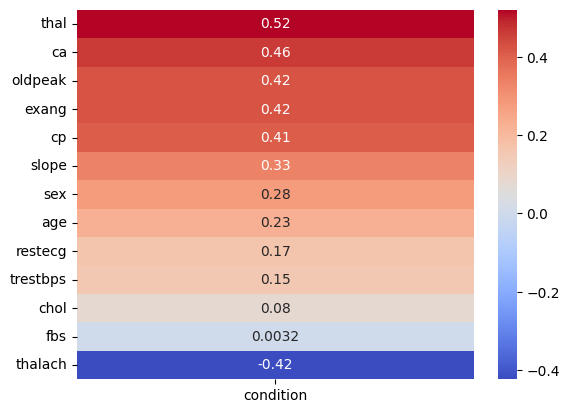

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

relations=df.corr(numeric_only=True)
target_corr=relations["condition"].drop("condition").sort_values(ascending=False)
sns.heatmap(target_corr.to_frame(),annot=True,cmap="coolwarm")
plt.show()

In [114]:
print(df.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [115]:
from sklearn.model_selection import train_test_split
df=df[["condition","thal","ca","cp","oldpeak","exang","thalach"]]
df=pd.get_dummies(df,columns=["thal","ca","cp","exang"],drop_first=True)
x=df.drop("condition",axis=1)
y=df["condition"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
clf=DecisionTreeClassifier(random_state=42)
params={
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, 6, 10, None],
    "min_samples_split": [1, 2, 3, 5, 10],
    "min_samples_leaf": [4, 6, 7, 8, 9]
}
grid=GridSearchCV(clf,params,cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
[[25  7]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.75      0.75      0.75        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



c:\Users\Optimus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
300 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Optimus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Optimus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Optimus\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

[Text(0.5526315789473685, 0.9166666666666666, 'cp_3 <= 0.5\nentropy = 0.995\nsamples = 237\nvalue = [128.0, 109.0]\nclass = 0'),
 Text(0.3157894736842105, 0.75, 'thalach <= 152.5\nentropy = 0.764\nsamples = 126\nvalue = [98, 28]\nclass = 0'),
 Text(0.4342105263157895, 0.8333333333333333, 'True  '),
 Text(0.15789473684210525, 0.5833333333333334, 'thal_2 <= 0.5\nentropy = 0.971\nsamples = 45\nvalue = [27, 18]\nclass = 0'),
 Text(0.10526315789473684, 0.4166666666666667, 'oldpeak <= 0.05\nentropy = 0.869\nsamples = 31\nvalue = [22, 9]\nclass = 0'),
 Text(0.05263157894736842, 0.25, 'entropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.15789473684210525, 0.25, 'oldpeak <= 1.15\nentropy = 0.773\nsamples = 22\nvalue = [17, 5]\nclass = 0'),
 Text(0.10526315789473684, 0.08333333333333333, 'entropy = 0.619\nsamples = 13\nvalue = [11, 2]\nclass = 0'),
 Text(0.21052631578947367, 0.08333333333333333, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]\nclass = 0'),
 Text(0.21052631578947367,

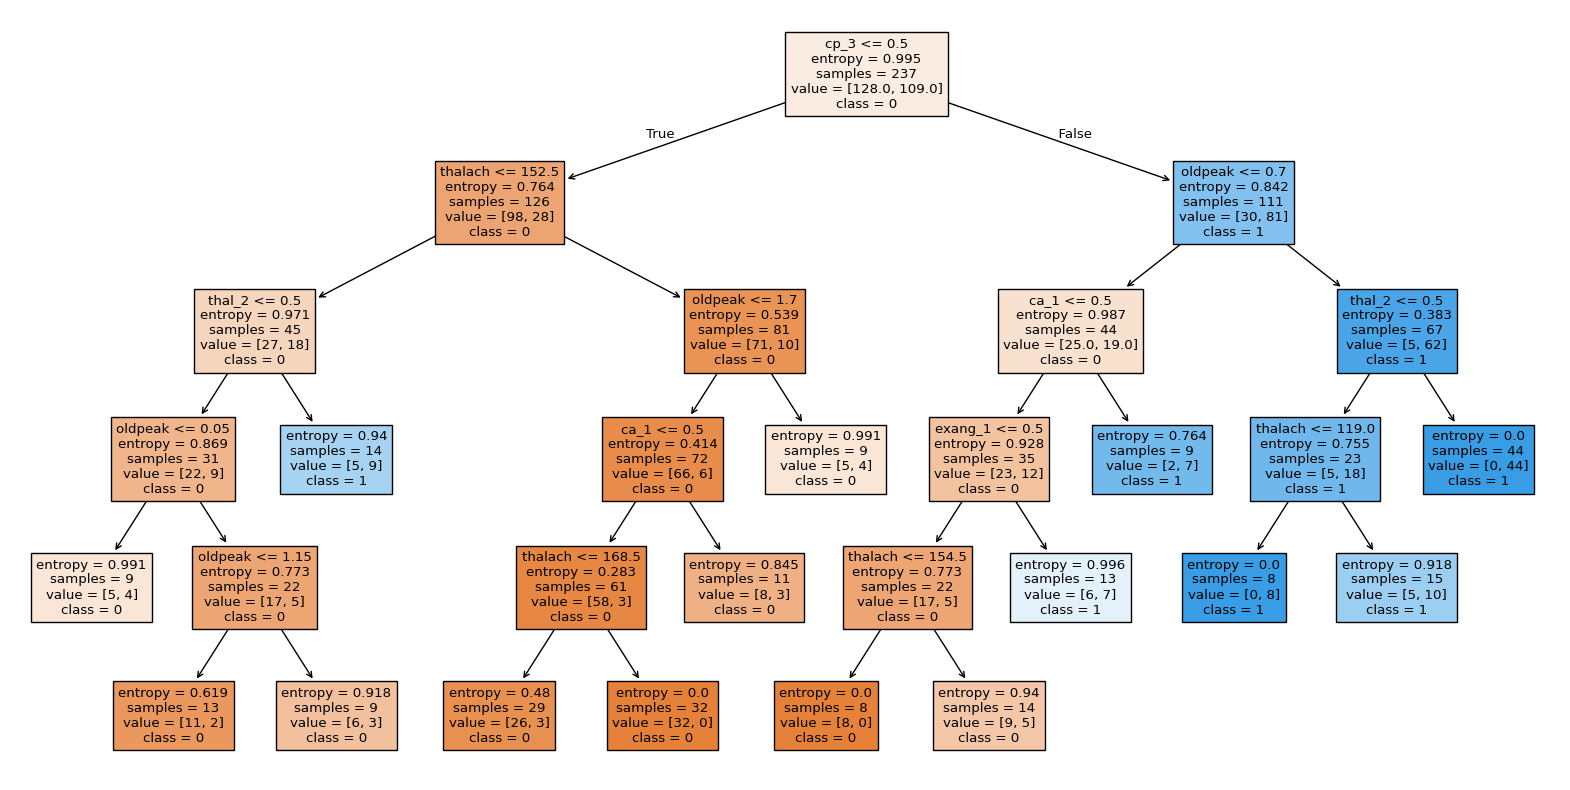

In [117]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model,filled=True,feature_names=x.columns,class_names=["0","1"])